In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns

In [2]:
hb=pd.read_csv("C:\\Users\\Rahul Patwal Rajput\\Downloads\\hotel_booking.csv")

In [3]:
htdf=hb.copy()

In [4]:
htdf.shape

(119390, 36)

In [5]:
htdf.head() # fro first 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
htdf.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
htdf['is_canceled'].value_counts(normalize=True)
# here 0 indicates- not canceled & 1 indicates- Cancellation

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [8]:
htdf['is_canceled']=htdf['is_canceled'].map({0:'NotCancelled',1:'Cancelled'})

In [9]:
htdf['is_canceled'].sample()

57058    Cancelled
Name: is_canceled, dtype: object

In [10]:
htdf['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
htdf.groupby(['hotel','is_canceled']).size().unstack()

is_canceled,Cancelled,NotCancelled
hotel,,
City Hotel,33102,46228
Resort Hotel,11122,28938


In [12]:
htdf.groupby(['hotel','is_canceled']).size()/htdf.shape[0]

hotel         is_canceled 
City Hotel    Cancelled       0.277259
              NotCancelled    0.387202
Resort Hotel  Cancelled       0.093157
              NotCancelled    0.242382
dtype: float64

In [13]:
# htdf[['hotel','is_canceled']].value_counts(normalize=True)

In [14]:
htdf['is_canceled'][htdf['hotel']=='City Hotel'].count()

79330

In [15]:
print(htdf['arrival_date_year'].max())
print(htdf['arrival_date_year'].min())

2017
2015


In [16]:
htdf.groupby(['arrival_date_year','hotel','is_canceled']).size()

arrival_date_year  hotel         is_canceled 
2015               City Hotel    Cancelled        6004
                                 NotCancelled     7678
                   Resort Hotel  Cancelled        2138
                                 NotCancelled     6176
2016               City Hotel    Cancelled       15407
                                 NotCancelled    22733
                   Resort Hotel  Cancelled        4930
                                 NotCancelled    13637
2017               City Hotel    Cancelled       11691
                                 NotCancelled    15817
                   Resort Hotel  Cancelled        4054
                                 NotCancelled     9125
dtype: int64

In [17]:
htdf['is_repeated_guest'].value_counts()
htdf['is_repeated_guest'].replace({0:'NotRepeated',1:'Repeated'},inplace=True)

<AxesSubplot:>

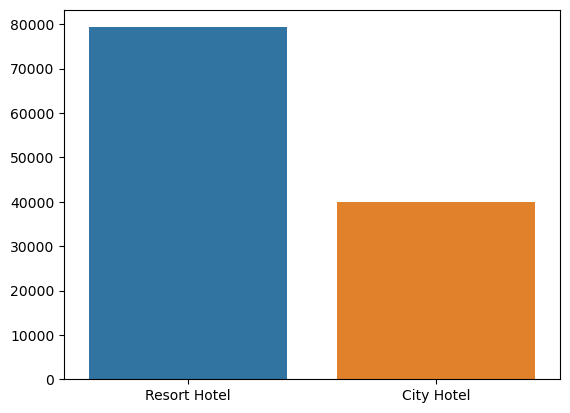

In [18]:
hotel=htdf['hotel'].value_counts()
# sns.barplot(x=hotel.index,y=hotel.values,hue=htdf['is_repeated_guest']
sns.barplot(x=htdf['hotel'].unique(),y=htdf['hotel'].value_counts().values)

<AxesSubplot:xlabel='hotel', ylabel='Probability'>

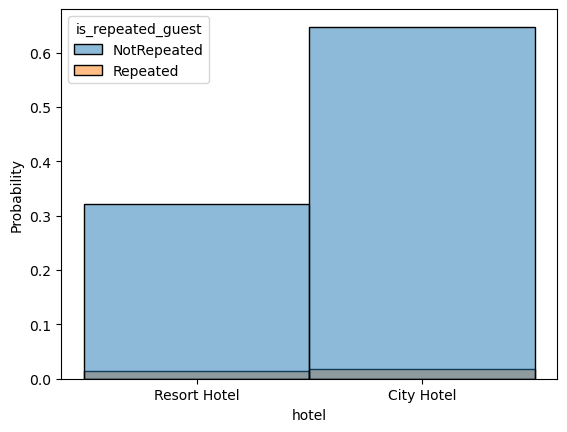

In [19]:
sns.histplot(x=htdf['hotel'],hue=htdf['is_repeated_guest'],stat='probability',fill=True,color='blue')

In [21]:
contvar=htdf.columns[htdf.dtypes!='O']
contvar

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
# contvar vs categorial dep var

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

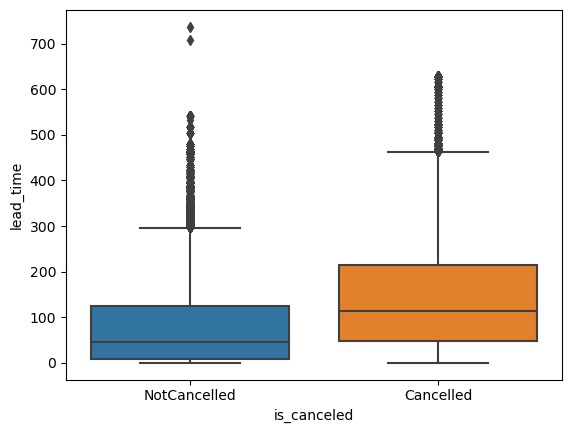

In [22]:
sns.boxplot(y='lead_time',x='is_canceled',data=htdf)

In [24]:
data=htdf.groupby(['arrival_date_year','is_canceled']).size()
data

arrival_date_year  is_canceled 
2015               Cancelled        8142
                   NotCancelled    13854
2016               Cancelled       20337
                   NotCancelled    36370
2017               Cancelled       15745
                   NotCancelled    24942
dtype: int64

In [27]:
#htdf['booking_changes'].sample(3)
htdf['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [28]:
htdf[['hotel','booking_changes','arrival_date_year']].sample(5)

,hotel,booking_changes,arrival_date_year
56475,City Hotel,0,2016
98335,City Hotel,0,2016
10389,Resort Hotel,2,2017
33815,Resort Hotel,2,2017
3441,Resort Hotel,0,2015


In [31]:
htdf['agent'].min()
htdf['agent'].max()

535.0

In [34]:
htdf['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [35]:
htdf['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

<AxesSubplot:xlabel='is_canceled', ylabel='adr'>

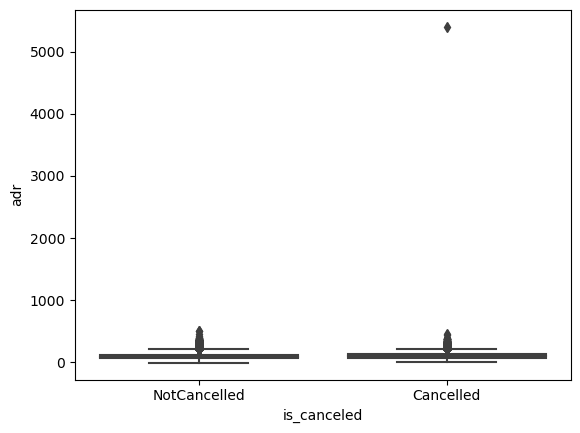

In [36]:
sns.boxplot(x='is_canceled',y='adr',data=htdf)

In [37]:
catvar=htdf.columns[htdf.dtypes=='O']
catvar

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'name', 'email', 'phone-number', 'credit_card'],
      dtype='object')

<AxesSubplot:xlabel='deposit_type', ylabel='Probability'>

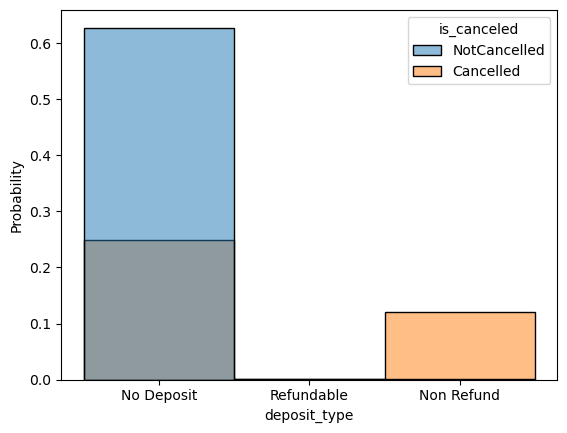

In [41]:
sns.histplot(x='deposit_type',hue='is_canceled',stat='probability',data=htdf)

<AxesSubplot:xlabel='reservation_status', ylabel='Probability'>

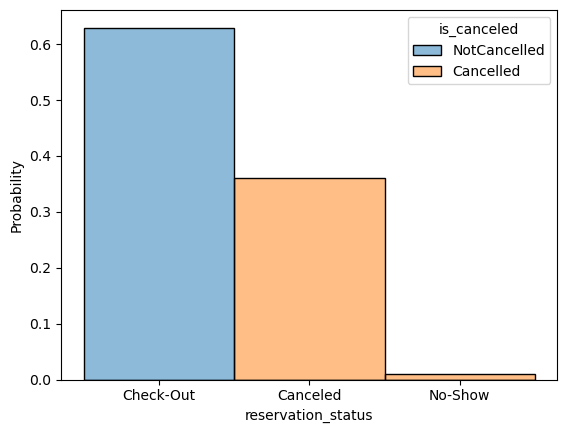

In [42]:
sns.histplot(x='reservation_status',stat='probability',hue='is_canceled',data=htdf)

<AxesSubplot:xlabel='credit_card', ylabel='Probability'>

C:\Users\Rahul Patwal Rajput\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


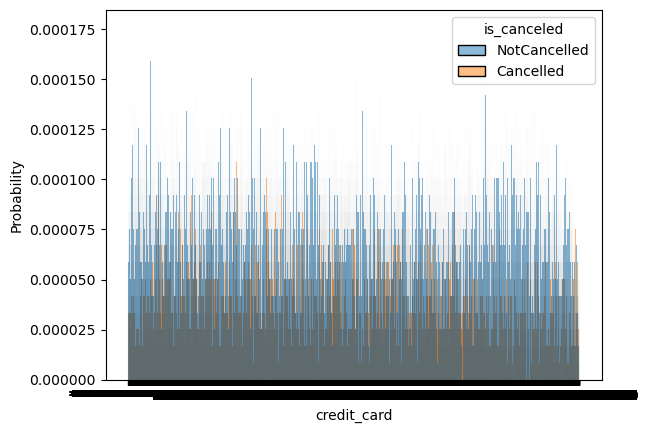

In [43]:
sns.histplot(x='credit_card',hue='is_canceled',data=htdf,stat='probability')

In [44]:
htdf['credit_card'].isnull().sum()

0

In [45]:
htdf.groupby('is_canceled')['credit_card'].size()

is_canceled
Cancelled       44224
NotCancelled    75166
Name: credit_card, dtype: int64

In [46]:
htdf.shape

(119390, 36)

In [47]:
df1=htdf[['is_canceled','credit_card']][htdf['is_canceled']=='Cancelled']

In [53]:
df1.isnull().sum()

is_canceled    0
credit_card    0
dtype: int64

In [57]:
htdf['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64